<a href="https://colab.research.google.com/github/wddonovan/SEF-ARIMA-Forecasting/blob/master/ARIMAforecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


(2928,)
ds
2019-08-07 10:00:00    21.906
2019-08-07 09:00:00    28.874
2019-08-07 08:00:00    33.087
2019-08-07 07:00:00    36.375
2019-08-07 06:00:00    35.021
2019-08-07 05:00:00    35.259
2019-08-07 04:00:00    47.041
2019-08-07 03:00:00    42.430
2019-08-07 02:00:00    40.292
2019-08-07 01:00:00    42.371
2019-08-07 00:00:00    44.745
2019-08-06 23:00:00    42.705
2019-08-06 22:00:00    41.484
2019-08-06 21:00:00    21.911
2019-08-06 20:00:00    33.938
2019-08-06 19:00:00    30.203
2019-08-06 18:00:00     0.068
2019-08-06 17:00:00     0.075
2019-08-06 16:00:00     0.081
2019-08-06 15:00:00     0.076
Name: y, dtype: float64


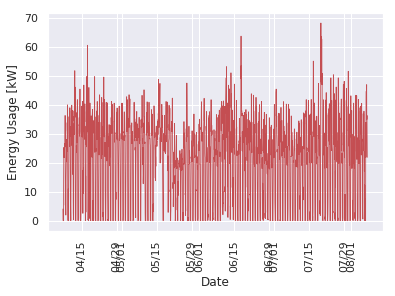

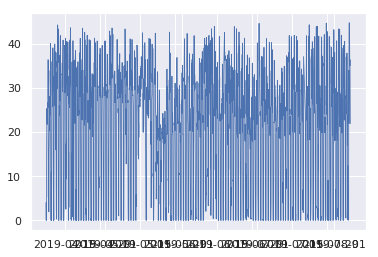

(2857,)


In [0]:
from pandas import read_csv
from pandas import Series
from datetime import datetime
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
from matplotlib.dates import DateFormatter
import seaborn as sns

#Code builds upon work by Jason Brownlee on MachineLearningMastery.com
#tutorial can be found at
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/



#uploads grid hourly data
series = Series.from_csv('ProphetData.csv', header=0)
print(series.shape)
# display first few rows
print(series.head(20))
# plot data
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
# Define the date format
myFmt = DateFormatter("%m/%d") 
fig, ax = pyplot.subplots()
ax.xaxis.set_major_formatter(myFmt)
pyplot.plot(series,'r',linewidth=0.8)
pyplot.xlabel('Date')
pyplot.xticks(rotation=90)
pyplot.ylabel('Energy Usage [kW]')
pyplot.show()
#remove outliers in series2
series2=series.copy()
series2=series[series> 5]
series2=series[series< 45]
# plot data
pyplot.plot(series2,'b',linewidth=0.8)
pyplot.show()
print(series2.shape)

In [0]:
#split data into training and test sets
splitpoint = len(series) - 400
dataset, validation = series[:splitpoint], series[splitpoint:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 2528, Validation 400


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [0]:

from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy


# load dataset
series = Series.from_csv('dataset.csv', header=None)
X = series.values
# fit model
model = ARIMA(X, order=(7,0,5)) #705 best
model_fit = model.fit()


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


473


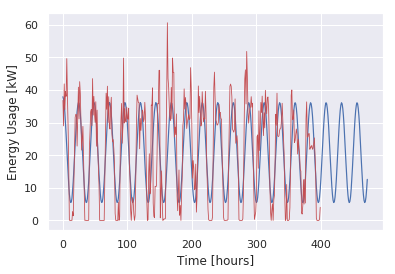

In [0]:
# multi-step out-of-sample forecast
start_index = len(X)
end_index = start_index + 472
forecast = model_fit.predict(start=start_index, end=end_index)
print(len(forecast))
#uncomment to print forecast values
#for date in forecast:
#	print(date)

#compare to test values y in valadation.csv
y = Series.from_csv('validation.csv', header=None)
predictions = y.values
#plot
sns.set_style("darkgrid")
sns.set(context='notebook')
pyplot.plot(forecast,'b',linewidth=1.2)
pyplot.plot(predictions,'r',linewidth=0.8)
pyplot.xlabel('Time [hours]')
pyplot.ylabel('Energy Usage [kW]')
#save images
pyplot.savefig('ArimaForecast3')
pyplot.show()